In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="твой ключ")
project = rf.workspace("aliud-videre").project("balls-detector-yl4ct")
dataset = project.version(4).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=1b6c74cb67e85f6987aa8d448dde6c91b14ec4f4fd9058042b190f5c38ad7421
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.


Extracting Dataset Version Zip to Balls-detector-4 in yolov8:: 100%|██████████| 1134/1134 [00:00<00:00, 1973.24it/s]


In [2]:
!pip install ultralytics
!pip install clearml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 12.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.0 MB/s eta 0:00:00


In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=
%env CLEARML_API_SECRET_KEY=

In [4]:
from ultralytics import YOLO

In [5]:
# Load the model.
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 59.3MB/s]


      10/10         0G      1.268      1.145      1.249         40        640: 100%|██████████| 63/63 [07:24<00:00,  7.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.64s/it]
                   all         30        110      0.999          1      0.995      0.885

10 epochs completed in 1.253 hours.
Optimizer stripped from runs/detect/yolov8n_custom8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom8/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom8/weights/best.pt...
Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.23s/it]
                   all         30        110      0.999          1      0.995      0.894
Speed: 9.5ms preprocess, 318.5ms inference, 0.

2023-05-24 20:10:22,755 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLOv8/yolov8n_custom.bbc76e5224b645ea9865454548bf7560/models/best.pt


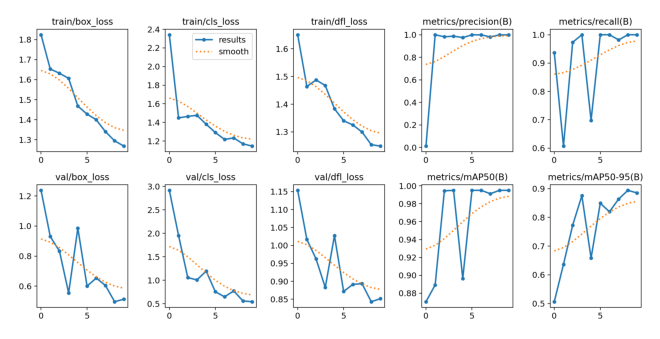

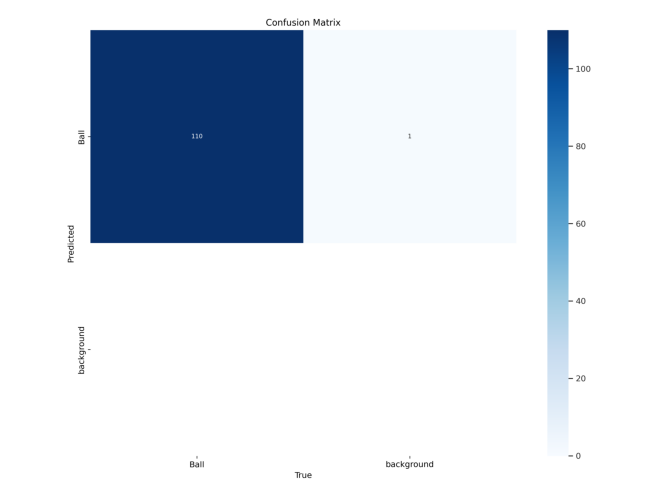

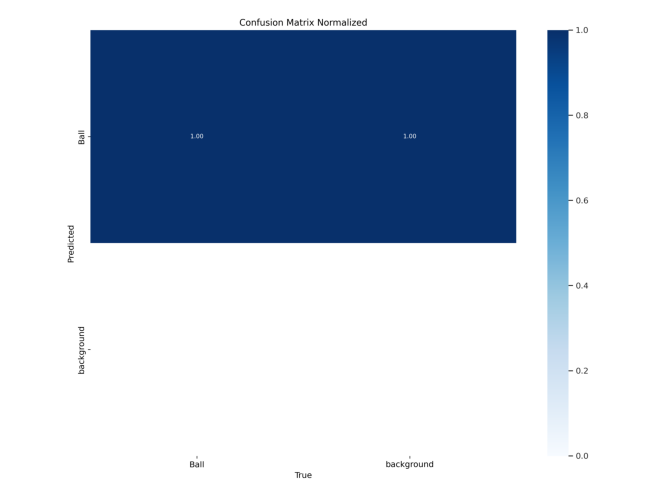

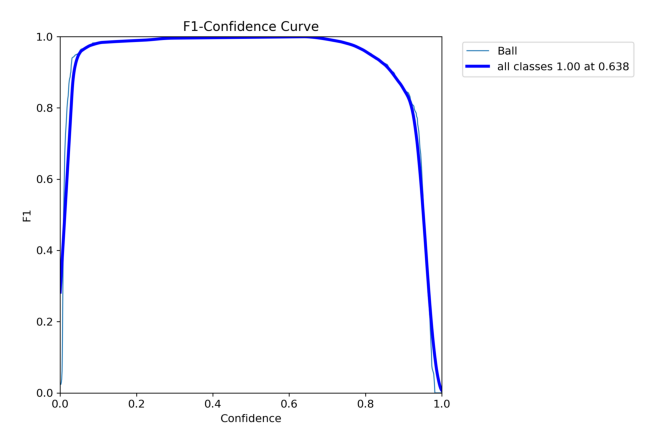

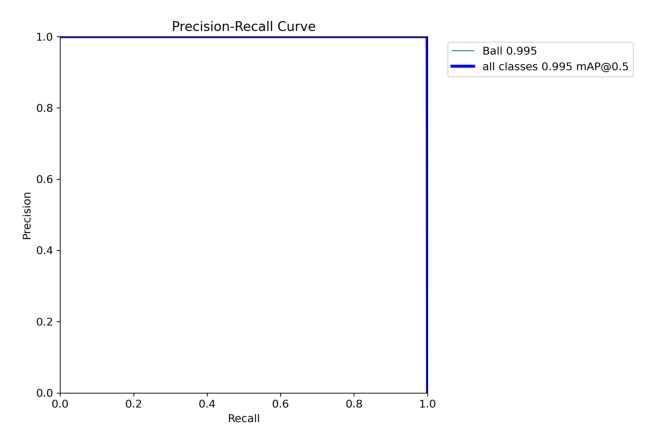

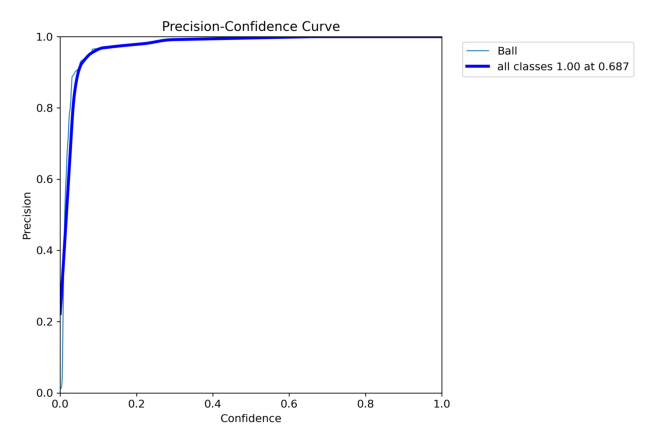

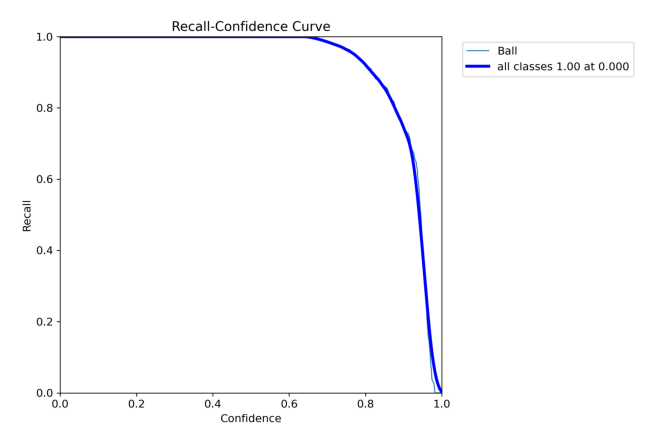

In [13]:
# Training.
results = model.train(
   data='data.yaml',
   imgsz=640,
   epochs=10,
   batch=8,
   name='yolov8n_custom')

In [18]:
model.export()

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

PyTorch: starting from runs/detect/yolov8n_custom8/weights/best.pt with input shape (8, 3, 640, 640) BCHW and output shape(s) (8, 5, 8400) (6.0 MB)

TorchScript: starting export with torch 2.0.1+cu118...
TorchScript: export success ✅ 12.3s, saved as runs/detect/yolov8n_custom8/weights/best.torchscript (11.9 MB)

Export complete (16.4s)
Results saved to /content/runs/detect/yolov8n_custom8/weights
Predict:         yolo predict task=detect model=runs/detect/yolov8n_custom8/weights/best.torchscript imgsz=640 
Validate:        yolo val task=detect model=runs/detect/yolov8n_custom8/weights/best.torchscript imgsz=640 data=data.yaml 
Visualize:       https://netron.app


'runs/detect/yolov8n_custom8/weights/best.torchscript'

In [24]:
!yolo predict task=detect model=runs/detect/yolov8n_custom8/weights/best.torchscript imgsz=640 source=photo.jpg

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Loading runs/detect/yolov8n_custom8/weights/best.torchscript for TorchScript inference...

image 1/1 /content/photo.jpg: 640x640 18 Balls, 656.5ms
Speed: 15.1ms preprocess, 656.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
